/tmp/ipykernel_3949170/2202952878.py:75: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#808080', label=r'$\mathit{k}_\mathrm{cat}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3949170/2202952878.py:76: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#3D5488', label=r'$\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3949170/2202952878.py:77: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#9AC9DB', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black')


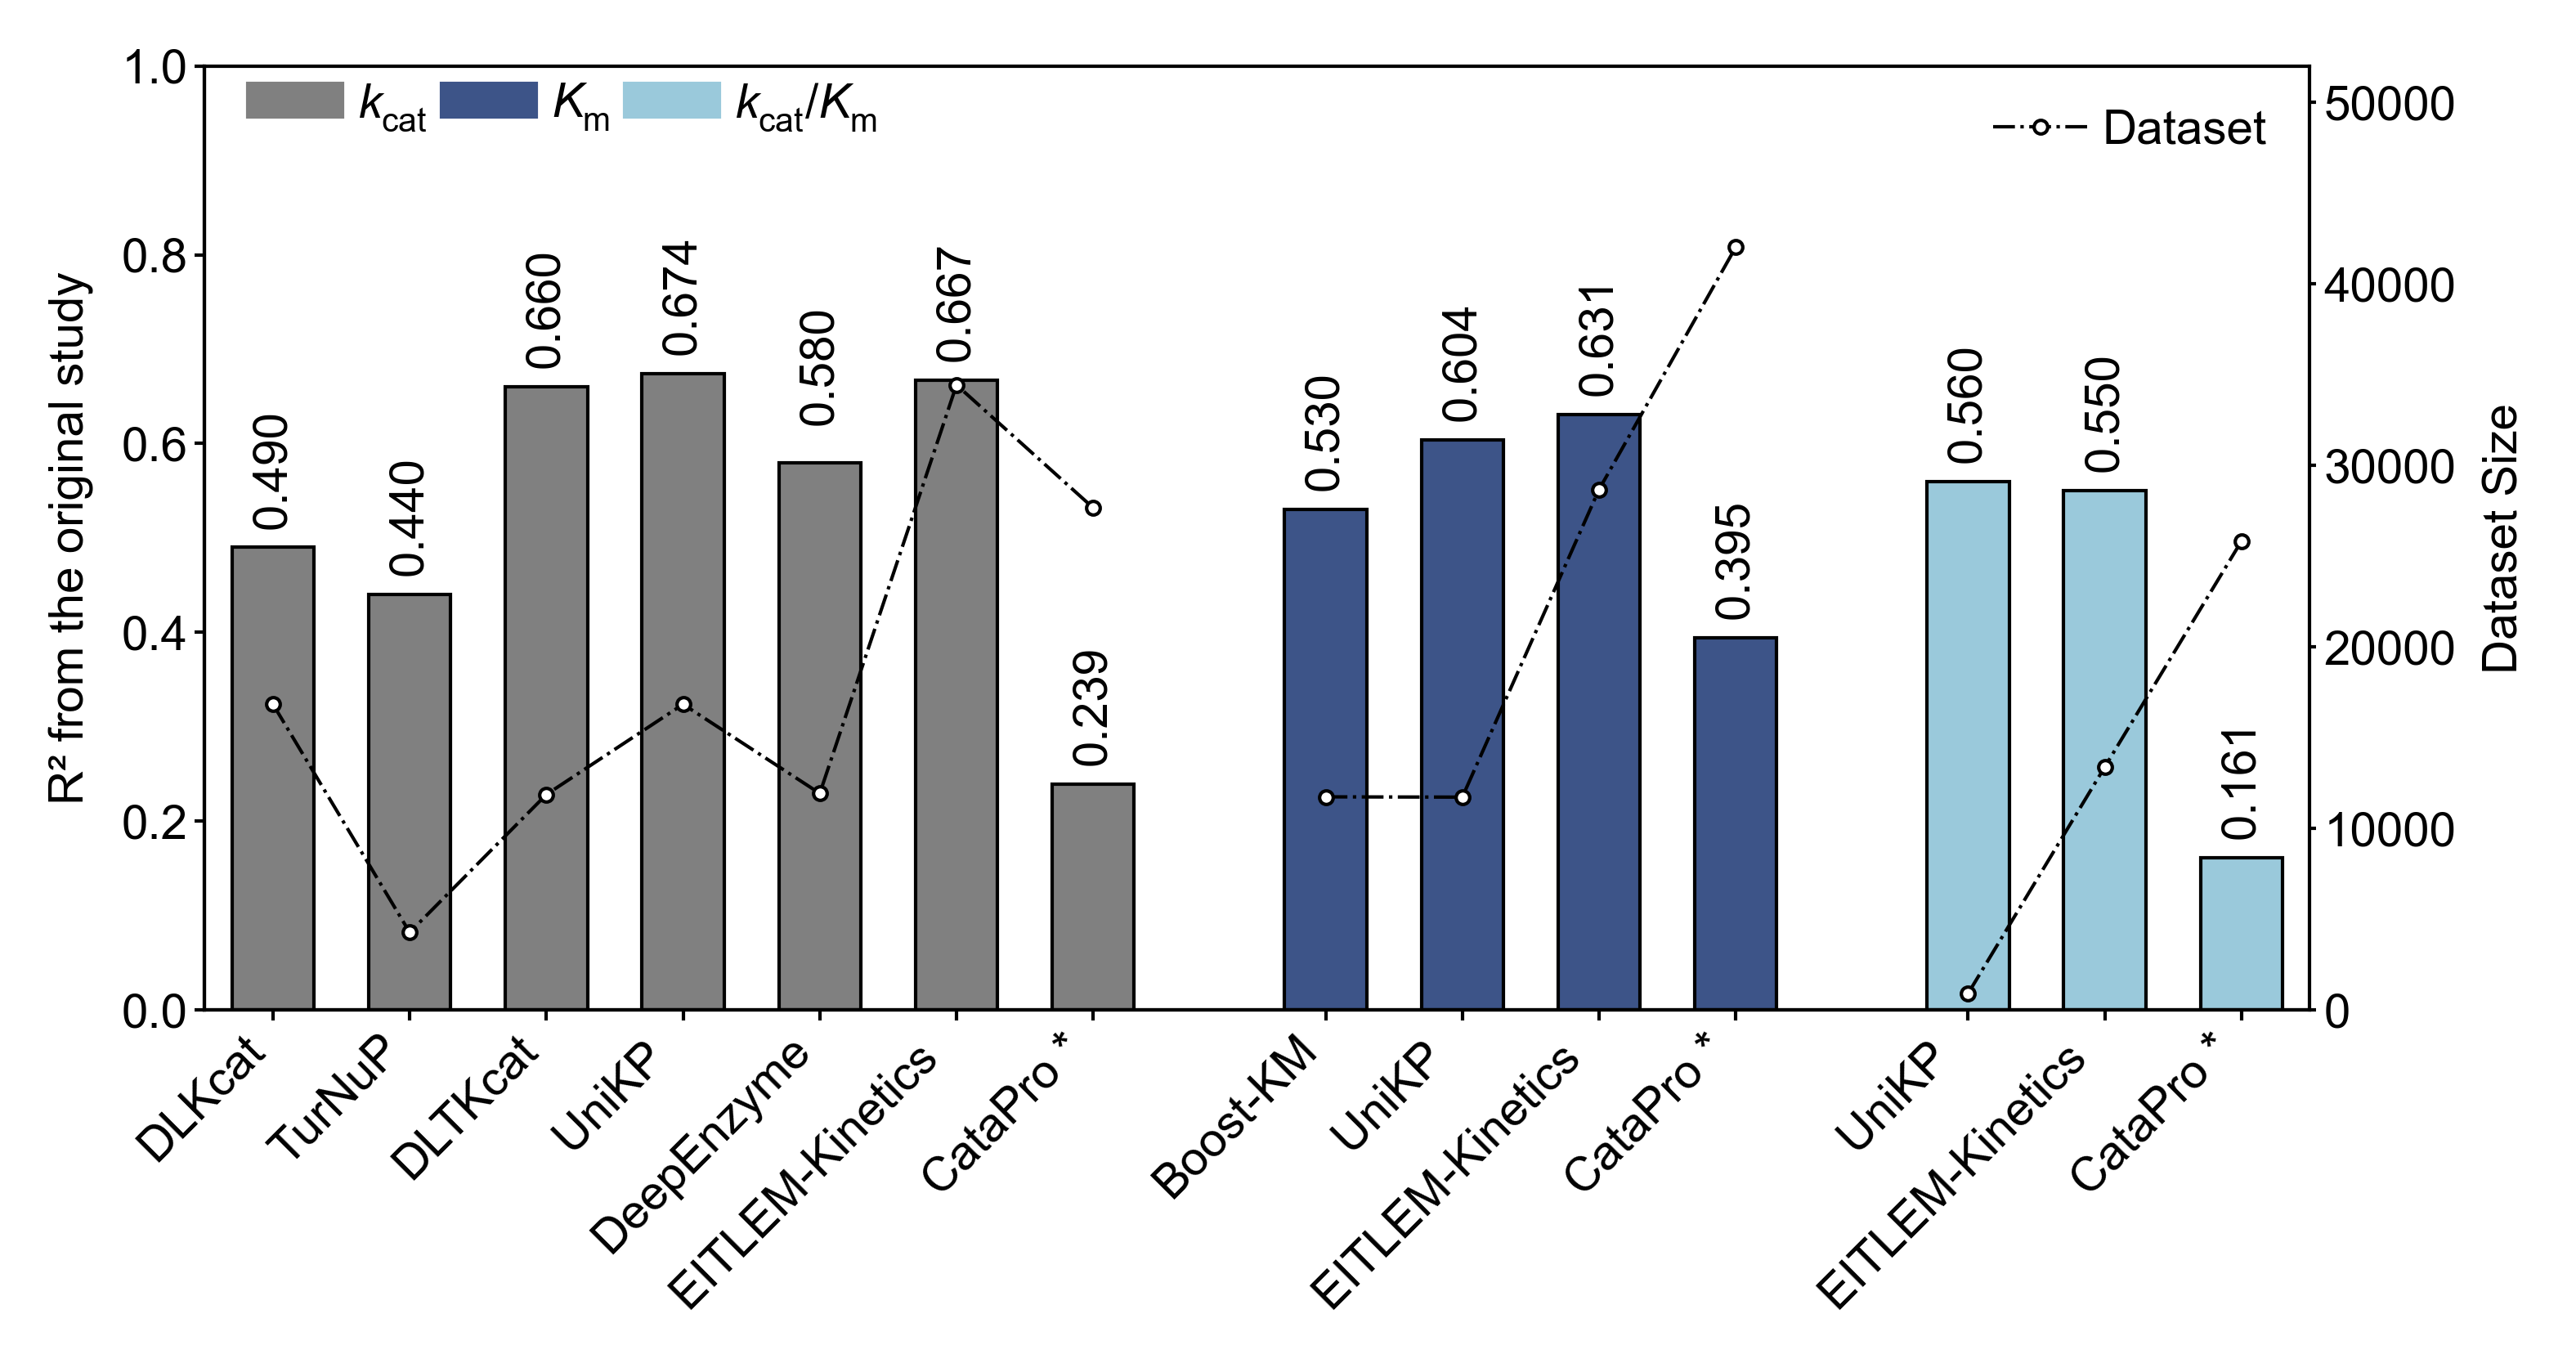

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# data
kcat_result = {
    'DLKcat': {'dataset': 16838, 'R2': 0.49,'R2_retrain':[0.5303,0.5502,0.5716,0.5708,0.5156]},
    'TurNuP': {'dataset': 4271, 'R2': 0.44,'R2_retrain':[0.6075065083266955,0.6073548942590357,0.6099144364011232,0.6188927159096812,0.6003621911781479]},
    'DLTKcat': {'dataset': 11866, 'R2': 0.66,'R2_retrain':[0.460942,0.492639,0.500527,0.52909,0.506579]},
    'UniKP (kcat)': {'dataset': 16838, 'R2': 0.674,'R2_retrain':[0.676045491259772,0.6791509234582808,0.6732446711177172,0.6725135104050445,0.6674242785112604]},
    'DeepEnzyme': {'dataset': 11927, 'R2': 0.58,'R2_retrain':[0.5282,0.4939,0.515,0.5137,0.527]},
    'EITLEM-Kinetics (kcat)': {'dataset': 34429, 'R2': 0.667,'R2_retrain':[0.629,0.624,0.636,0.631,0.621]},
    'CataPro (kcat)*': {'dataset': 27658, 'R2': 0.2393,'R2_retrain':[0.5747,0.5731,0.5716,0.3619,0.5936]},
    'Boost-KM': {'dataset': 11737, 'R2': 0.53,'R2_retrain':[0.6060353075180863,0.6035120660240516,0.6042874434504121,0.5854371963745626,0.6341670802583872]},
    'UniKP (Km)': {'dataset': 11722, 'R2': 0.604,'R2_retrain':[0.6610158707425453,0.6564454625389502,0.6563254574013849,0.6648900051325772,0.6728151368349802]},
    'EITLEM-Kinetics (Km)': {'dataset': 28664, 'R2': 0.631,'R2_retrain':[0.581,0.579,0.572,0.578,0.584]},
    'CataPro (Km)*': {'dataset': 42018, 'R2': 0.3945,'R2_retrain':[0.6124,0.5927,0.5838,0.5945,0.6059]},
    'UniKP (kcat/Km)': {'dataset': 910, 'R2': 0.560,'R2_retrain':[0.592396735279433,0.6111964832571416,0.5689084494304553,0.5755353797241127,0.5956242963594436]},
    'EITLEM-Kinetics (kcat/Km)': {'dataset': 13388, 'R2': 0.550,'R2_retrain':[0.558,0.549,0.562,0.559,0.552]},
    'CataPro (kcat/Km)*': {'dataset': 25831, 'R2': 0.1613,'R2_retrain':[0.5103,0.5328,0.5310,0.4884,0.4468]},
}

data = {
    'Model': list(kcat_result.keys()),
    'Dataset': [v['dataset'] for v in kcat_result.values()],
    'R2': [v['R2'] for v in kcat_result.values()],
    'R2_retrain_mean': [np.mean(v['R2_retrain']) for v in kcat_result.values()],
    'R2_retrain_std': [np.std(v['R2_retrain']) for v in kcat_result.values()]
}
df = pd.DataFrame(data)
df['Model'] = df['Model'].apply(lambda x:x.replace('(kcat)',''))
df['Model'] = df['Model'].apply(lambda x:x.replace('(Km)',''))
df['Model'] = df['Model'].apply(lambda x:x.replace('(kcat/Km)',''))

x_pos = [0, 1, 2, 3, 4, 5, 6, 7.7, 8.7, 9.7, 10.7, 12.4, 13.4, 14.4]
colors = ['#808080'] * 7 + ['#3D5488'] * 4 + ['#9AC9DB'] * 3
category_labels = ['kcat'] * 7 + ['Km'] * 4 + ['kcat/Km'] * 3

plt.figure(figsize=(5.8, 2.6), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0)
plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)

bars = plt.bar(x_pos, df['R2'], color=colors, width=0.6, edgecolor='black', linewidth=0.5, alpha=1)
for bar in bars:
    yval = bar.get_height()
    if bar.get_x() != 3.7:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.04, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.xticks(x_pos, df['Model'], fontsize=7, rotation=45, ha='right')
plt.yticks(fontsize=7)
plt.ylabel('R² from the original study', fontsize=7)
plt.ylim(0, 1.0)
plt.xlim(-0.5, max(x_pos) + 0.5)

patches = [
    mpatches.Patch(color='#808080', label=r'$\mathit{k}_\mathrm{cat}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#3D5488', label=r'$\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#9AC9DB', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black')
]
plt.legend(handles=patches, frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(0., 1.03), ncol=3, 
           labelspacing=0.5, handletextpad=0.3, columnspacing=0.3)

plt.twinx()
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)

plt.plot(x_pos[0:7], df['Dataset'][0:7], marker='o', color='black', markersize=2, linestyle='-.', linewidth=0.5, 
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=0.5, label='Dataset')

plt.plot(x_pos[7:11], df['Dataset'][7:11], marker='o', color='black', markersize=2, linestyle='-.', linewidth=0.5, 
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=0.5)

plt.plot(x_pos[11:14], df['Dataset'][11:14], marker='o', color='black', markersize=2, linestyle='-.', linewidth=0.5, 
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=0.5)

plt.legend(frameon=False, fontsize=7, loc='upper right', bbox_to_anchor=(1, 1), labelspacing=0.5, handletextpad=0.3)

plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=1)
plt.ylabel('Dataset Size', fontsize=7)
plt.yticks([0,10000,20000,30000,40000,50000],fontsize=7)
plt.ylim(0,52000)

plt.savefig('../../Figure/fig1a.pdf', dpi=600, bbox_inches='tight')
plt.show()

/tmp/ipykernel_3020182/718446954.py:78: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#808080', label=r'$\mathit{k}_\mathrm{cat}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3020182/718446954.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#3D5488', label=r'$\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
/tmp/ipykernel_3020182/718446954.py:80: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='#9AC9DB', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black')


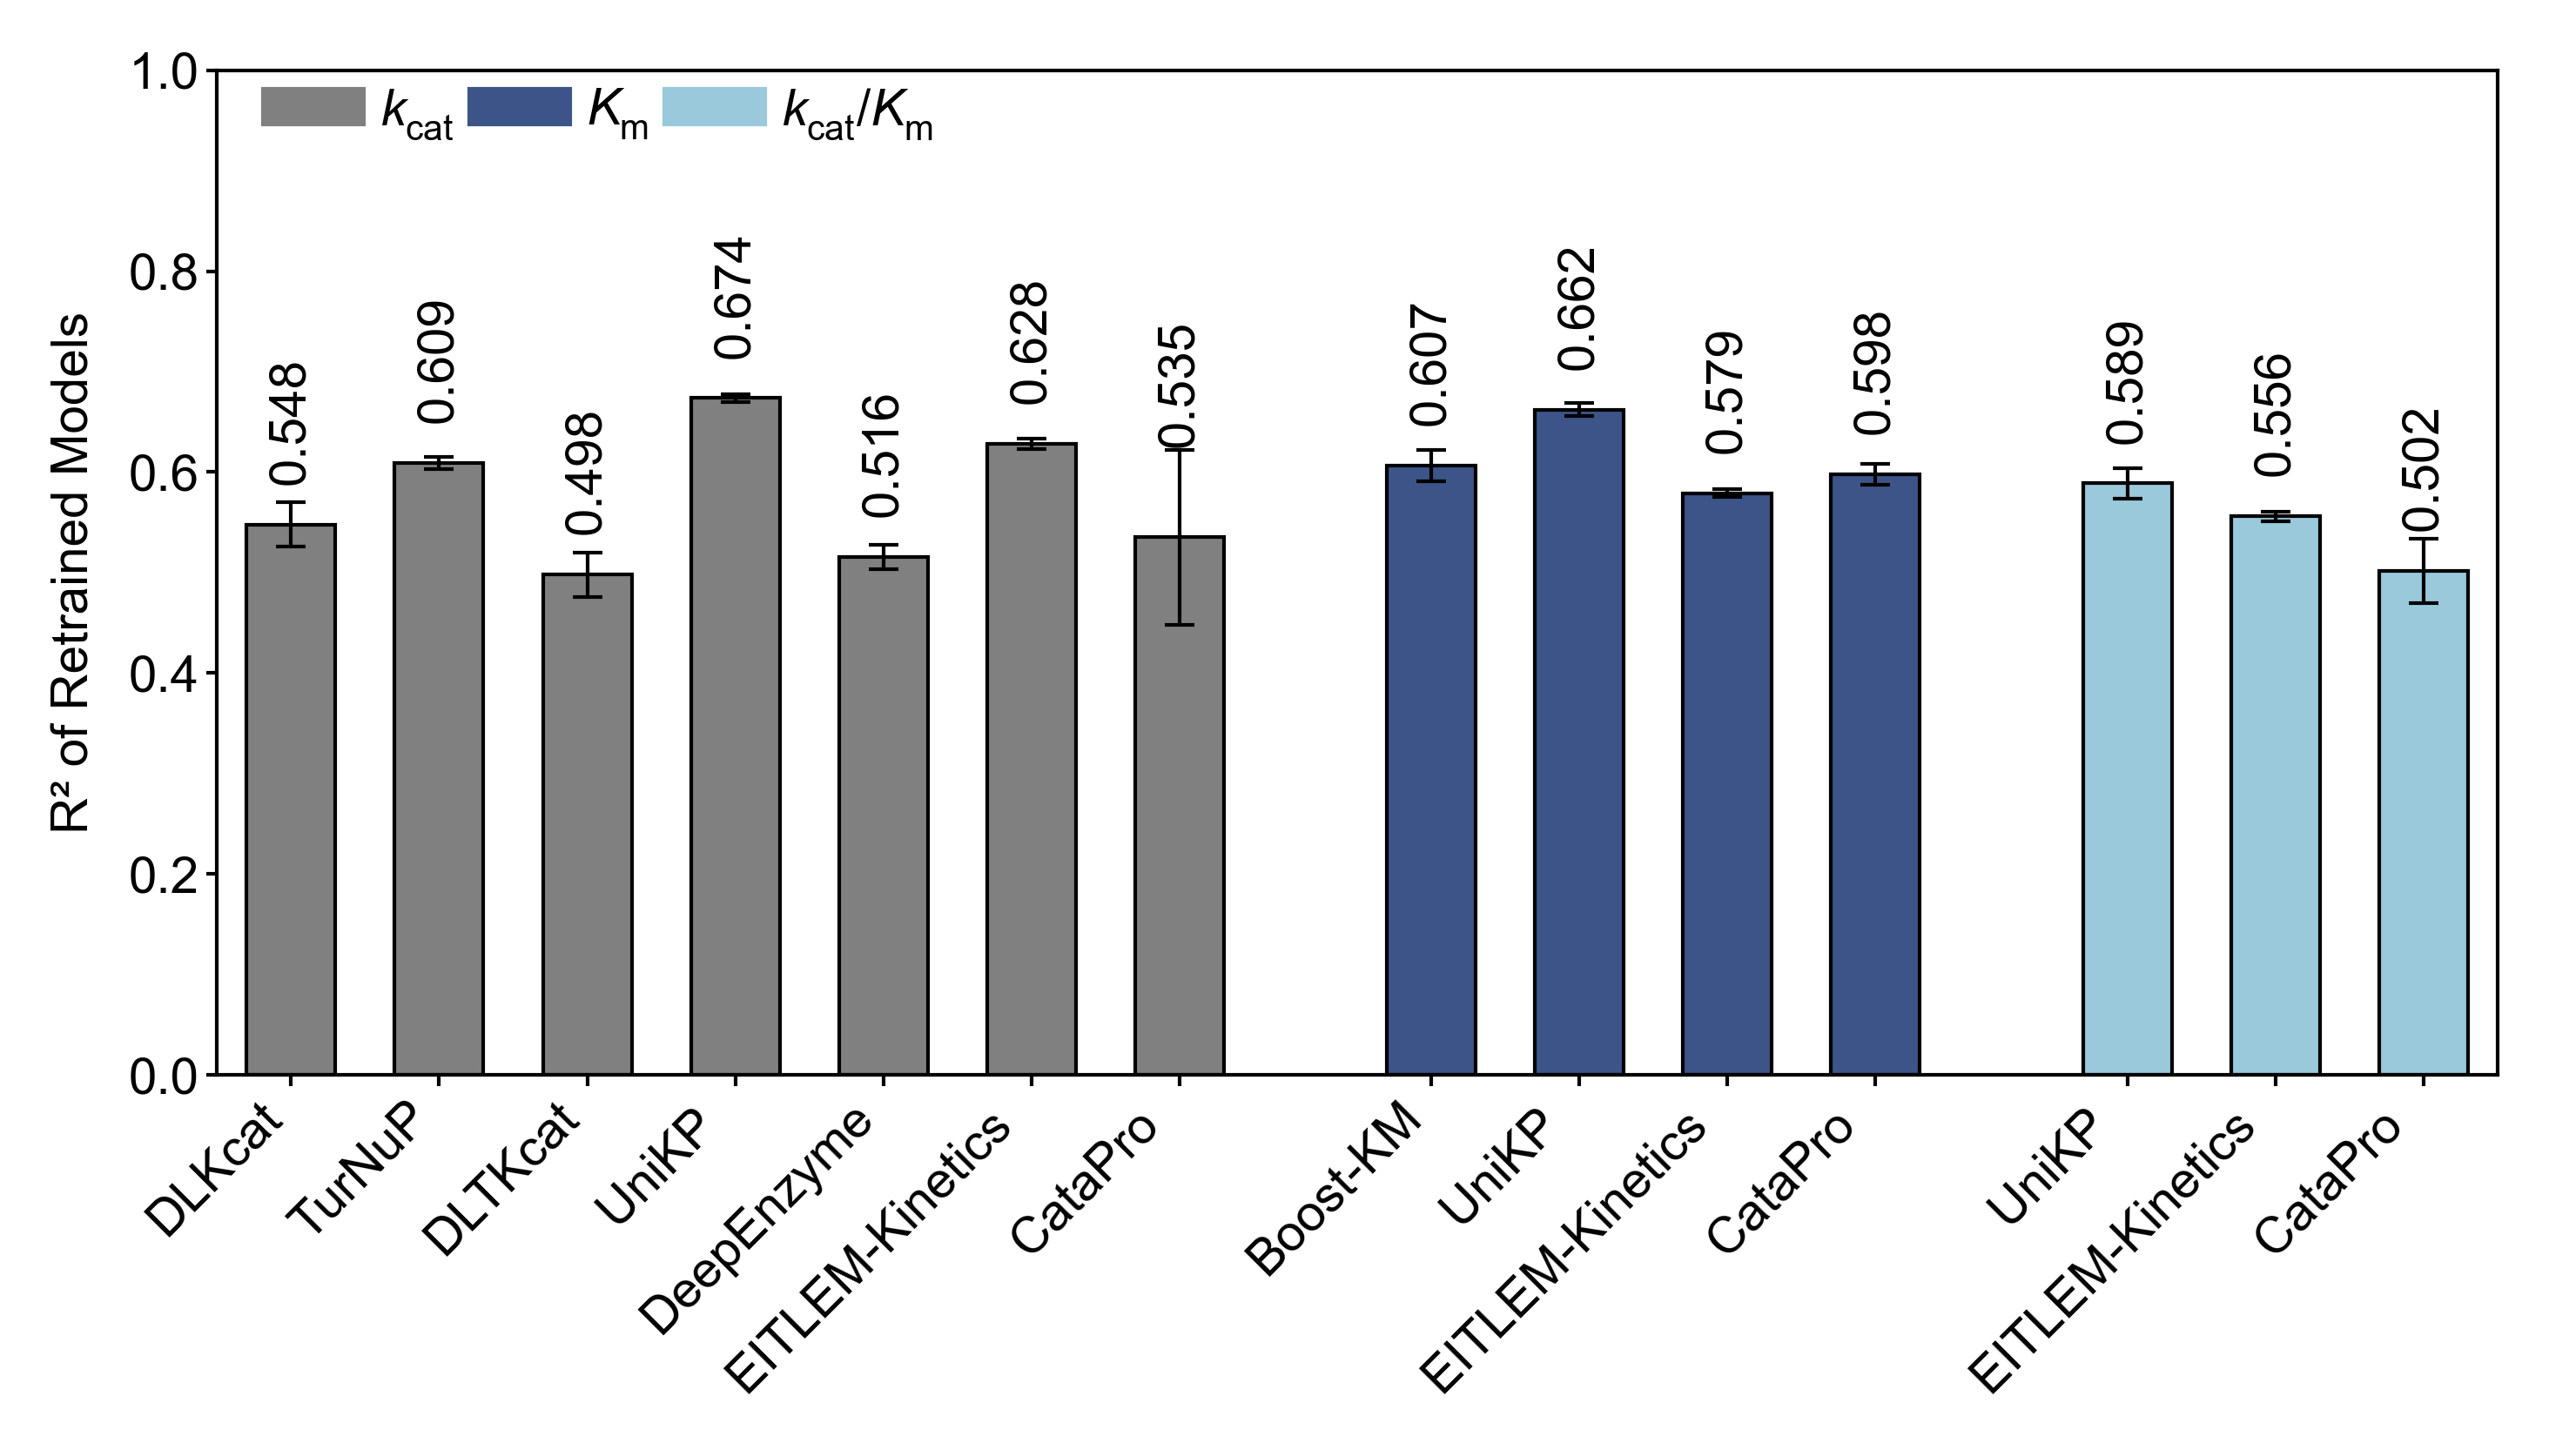

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

kcat_result = {
    'DLKcat': {'dataset': 16838, 'R2': 0.44,'R2_retrain':[0.5303,0.5502,0.5716,0.5708,0.5156]},    
    'TurNuP': {'dataset': 4271, 'R2': 0.44,'R2_retrain':[0.60750650,0.60735489,0.6099144364,0.618892715,0.600362191]},
    'DLTKcat': {'dataset': 11866, 'R2': 0.66,'R2_retrain':[0.460942,0.492639,0.500527,0.52909,0.506579]},
    'UniKP (kcat)': {'dataset': 16838, 'R2': 0.674,'R2_retrain':[0.676045491259772,0.6791509234582808,0.67324467,0.672513510,0.66742427]},
    'DeepEnzyme': {'dataset': 11927, 'R2': 0.58,'R2_retrain':[0.5282,0.4939,0.515,0.5137,0.527]},
    'EITLEM-Kinetics (kcat)': {'dataset': 34429, 'R2': 0.667,'R2_retrain':[0.629,0.624,0.636,0.631,0.621]},
    'CataPro (kcat)': {'dataset': 27658, 'R2': 0.2393,'R2_retrain':[0.5747,0.5731,0.5716,0.3619,0.5936]},
    'Boost-KM': {'dataset': 11737, 'R2': 0.53,'R2_retrain':[0.6060353075,0.6035120660,0.60428744,0.58543719,0.6341670802]},
    'UniKP (Km)': {'dataset': 11722, 'R2': 0.604,'R2_retrain':[0.66101587,0.6564454625,0.6563254574,0.6648900051,0.6728151368]},
    'EITLEM-Kinetics (Km)': {'dataset': 28664, 'R2': 0.631,'R2_retrain':[0.581,0.579,0.572,0.578,0.584]},
    'CataPro (Km)': {'dataset': 42018, 'R2': 0.3945,'R2_retrain':[0.6124,0.5927,0.5838,0.5945,0.6059]},
    'UniKP (kcat/Km)': {'dataset': 910, 'R2': 0.560,'R2_retrain':[0.59239673,0.61119648,0.56890844,0.575535379,0.59562429]},
    'EITLEM-Kinetics (kcat/Km)': {'dataset': 13388, 'R2': 0.550,'R2_retrain':[0.558,0.549,0.562,0.559,0.552]},
    'CataPro (kcat/Km)': {'dataset': 25831, 'R2': 0.1613,'R2_retrain':[0.5103,0.5328,0.5310,0.4884,0.4468]},
}

data = {
    'Model': list(kcat_result.keys()),
    'Dataset': [v['dataset'] for v in kcat_result.values()],
    'R2': [v['R2'] for v in kcat_result.values()],
    'R2_retrain_mean': [np.mean(v['R2_retrain']) for v in kcat_result.values()],
    'R2_retrain_std': [np.std(v['R2_retrain']) for v in kcat_result.values()]
}
df = pd.DataFrame(data)
df['Model'] = df['Model'].apply(lambda x:x.replace('(kcat)',''))
df['Model'] = df['Model'].apply(lambda x:x.replace('(Km)',''))
df['Model'] = df['Model'].apply(lambda x:x.replace('(kcat/Km)',''))

x_pos = [0, 1, 2, 3, 4, 5, 6, 7.7, 8.7, 9.7, 10.7, 12.4, 13.4, 14.4]
colors = ['#808080'] * 7 + ['#3D5488'] * 4 + ['#9AC9DB'] * 3
category_labels = ['kcat'] * 7 + ['Km'] * 4 + ['kcat/Km'] * 3

plt.figure(figsize=(5.9, 2.6), dpi=600)
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  
    'mathtext.rm': 'Arial',        
    'mathtext.it': 'Arial:italic', 
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})

plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)

bars = plt.bar(x_pos, df['R2_retrain_mean'], color=colors, width=0.6, edgecolor='black', linewidth=0.5, alpha=1)
for bar in bars:
    # print(bar)
    yval = bar.get_height()
    if bar.get_x() != 5.7:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.04, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.09, f'{yval:.3f}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.errorbar(x_pos, df['R2_retrain_mean'], yerr=df['R2_retrain_std'], fmt='none', 
             ecolor='black', elinewidth=0.5, capsize=2.0, capthick=0.5)

plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1.5, pad=1)
plt.xticks(x_pos, df['Model'], fontsize=7, rotation=45, ha='right')
plt.yticks(fontsize=7)
plt.ylabel('R² of Retrained Models', fontsize=7)
plt.ylim(0, 1.0)
plt.xlim(-0.5, max(x_pos) + 0.5)

patches = [
    mpatches.Patch(color='#808080', label=r'$\mathit{k}_\mathrm{cat}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#3D5488', label=r'$\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black'),
    mpatches.Patch(color='#9AC9DB', label=r'$\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$', linewidth=0.5, edgecolor='black')
]
plt.legend(handles=patches, frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(0., 1.03), ncol=3, 
           labelspacing=0.5, handletextpad=0.3, columnspacing=0.3)

plt.savefig('../../Figure/fig1c.pdf', dpi=600, bbox_inches='tight')
plt.show()